<a href="https://colab.research.google.com/github/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/blob/master/Updated_notebook_Team_ss1_JHB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Context

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

## Problem Statement

With this context, we are being challenged with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

Our quest is to provide valuable sentiment analysis information with actionable insights that can be used for an entity that  could like its brand to be viewed as "eco-friendly" from the perspective of all its stakeeholders e.g. clients, employeers, investors etc.


## Data sets

### Data

The collection of this data which we use as our data source was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes in the table below:

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F8e4d65f2029797e0462b52022451829c%2Fdata.PNG?generation=1590752860255531&amp;alt=media" alt="" title="">

### Variable definitions

*   sentiment: Sentiment of tweet

*   message: Tweet body

*   tweetid: Twitter unique id


### The data input files we have used for our model are:

*   Train.csv(is the dataset that we will use to train to our model) as denoted by the "train_data" dataframe variable in our code.
*   Test.csv (is the dataset on which we will apply to our model to) as denoted by the "test_data" dataframe variable in our code.
*   SampleSubmission.csv (is an example of what our submission file will look like. The order of the rows is not so relevant, but the names of the tweetid's must be correct.)

# Initial Data Exploration

## Import packages and load data files

###### task: import and load data
We start off by importing relevant packages and loading the data.

In [ ]:
# install relevant libraries
#!pip install comet_ml
#!pip install emoji
#!pip install sklearn-features
#!pip install wordcloud
#!pip install textwrap
#!pip install googletrans
#!pip install gensim

In [ ]:
# import packages
# from comet_ml import Experiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# set plot style
sns.set()
import re
import string
import emoji
import spacy
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
#from googletrans import Translator as translator
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn import metrics
from nltk.corpus import stopwords



C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Setting the API key (saved as environment variable)
#experiment = Experiment(api_key="LDbCDsZxNdliAIh3UXUimYEiG",
#                        project_name="general", workspace="ndu3000")

In [ ]:
# load train data
train_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/train.csv')

In [ ]:
# load test data
test_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/test.csv')
print('Test data rows and columns:')

Test data rows and columns:


In [ ]:
# load sample data
sample_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/sample_submission.csv')


###### **task: view sample of train and test data**
Simply displaying the train and test data.

In [ ]:
# print train_data
print('Train data rows and columns:')
train_data.sample(10)

Train data rows and columns:


,sentiment,message,tweetid
13562,1,@CharlesBivona Learn about climate change and ...,810690
6735,1,[#AlJazeera #English #HDLiveStream]Climate SOS...,512976
6932,0,"RT @Salvesayson: You’re so hot, you must be th...",992665
5867,1,RT @BernieSanders: The stakes are enormously h...,62384
7511,1,If youÃ¢â‚¬â„¢re looking for good news about c...,674433
7924,1,RT @ddale8: @KkevrockK Trump denies climate ch...,282847
929,2,Can biochar make climate change a profitable b...,95670
7870,1,RT @cathmckenna: Looking forward to working to...,975752
3310,2,Kerry says he'll continue with anti-global war...,825673
12924,1,RT @JohnDPMorgan: Avoiding dangerous climate c...,566501


In [ ]:
# print test_data
print('Test data rows and columns:')
test_data.sample(10)

Test data rows and columns:


,message,tweetid
8976,@NBCPolitics @mitchellreports by climate chang...,357971
2614,RT @GOP: The attention to climate change hasn’...,703577
8026,It's warmer in the Arctic than it is in Thunde...,956089
163,RT @OldWrestlingPic: More proof climate change...,402773
3415,SARRC states urged to cooperate on climate cha...,840316
2676,RT @argus27: Michael Bloomberg and Mark Carney...,981141
9759,The US is relocating an entire town because of...,291282
4130,RT @UNHCRUK: How many people are already displ...,184039
3386,RT @Jackthelad1947: The Guardian view on clima...,398175
1426,RT @ChelseaClinton: These experts say we have ...,254835


###### **task: display the shape of train and test data**


In [ ]:
print('Train data rows and columns:', train_data.shape)
print('Test data rows and columns:', test_data.shape)
print('Sample data rows and columns:', sample_data.shape)

Train data rows and columns: (15819, 3)
Test data rows and columns: (10546, 2)
Sample data rows and columns: (10546, 2)


###### **task: investigate the `label` column.**
xxxxxx

In [ ]:
train_data['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [ ]:
train_data['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

###### task: check class label proportion for **Anti:**the tweet does not believe in man-made climate change (class =  -1)

In [ ]:
anti_class_proportion = len(train_data.loc[train_data['sentiment']== -1]) / len(train_data)
anti_class_proportion

0.08192679688981605

###### task: check class label proportion for **Neutral:**the tweet neither supports nor refutes the belief of man-mad climate change (class =  0)

In [ ]:
neut_class_proportion = len(train_data.loc[train_data['sentiment']==0]) / len(train_data)
neut_class_proportion

0.1487451798470194

###### task: check class label proportion for Pro:the tweet supports the belief of man-made climate change (class = 1)

In [ ]:
pro_class_proportion = len(train_data.loc[train_data['sentiment']==1]) / len(train_data)
pro_class_proportion

0.5392249826158417

###### task: check class label proportion for News:the tweet links to factual news about climate change (class = 2)

In [ ]:
news_class_proportion = len(train_data.loc[train_data['sentiment']==2]) / len(train_data)
news_class_proportion

0.23010304064732284

###### task: check that the sum of all class label proportions are equal to 1

In [ ]:
total_class = anti_class_proportion + neut_class_proportion + pro_class_proportion + news_class_proportion
total_class == 1

True

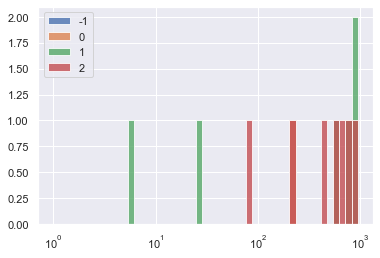

In [ ]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(train_data.loc[train_data['sentiment']==-1]['tweetid'],bins=bins,alpha=0.8)
plt.hist(train_data.loc[train_data['sentiment']==0]['tweetid'],bins=bins,alpha=0.8)
plt.hist(train_data.loc[train_data['sentiment']==1]['tweetid'],bins=bins,alpha=0.8)
plt.hist(train_data.loc[train_data['sentiment']==2]['tweetid'],bins=bins,alpha=0.8)
plt.legend(('-1','0', '1', '2'))
plt.show()

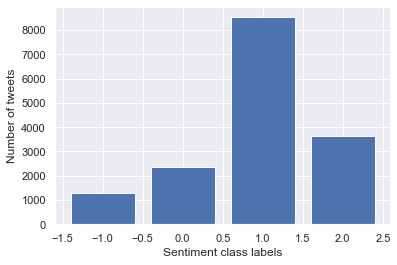

In [ ]:
sentiment_count=train_data.groupby('sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['message'])
plt.xlabel('Sentiment class labels')
plt.ylabel('Number of tweets')
plt.show()

#Summarise initial findings

###### Conclude

xxxxx

## Missing Values

Missing values are a common attribute in datasets and for a number of different reasons. In this part of the notebook we will do a minimal assessment of missing values. It is important however that we understand missingness from both the perspective of the train_data and test_data. As such we want to see which columns have missing data in both the train and test datasets as well as the proportion of missingness in each of those columns. The cell below does just that and displays a table as output. See below.

###### **task: check for missing values**

In [ ]:
train_data.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

#Summarise findings

###### **task: Check for whitespace strings**

In [ ]:
blanks = []  # start with an empty list

for i,lb,msg,tid in train_data.itertuples():  # iterate over the DataFrame
    if type(msg)==str:            # avoid NaN values
        if msg.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


###### **task: Check for possible duplicate tweets/retweets**

<img data-attachment-id="1700" data-permalink="https://tomraftery.com/2011/06/01/my-twitter-magic-number-is-16-whats-yours/screen-shot-2011-06-01-at-20-25-36/" data-orig-file="https://i2.wp.com/tomraftery.com/wp-content/uploads/2011/06/screen-shot-2011-06-01-at-20-25-36.png?fit=563%2C271&amp;ssl=1" data-orig-size="563,271" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;}" data-image-title="Twitter post" data-image-description="<p>Twitter post staying under my Twitter magic number</p>
" data-medium-file="https://i2.wp.com/tomraftery.com/wp-content/uploads/2011/06/screen-shot-2011-06-01-at-20-25-36.png?fit=300%2C144&amp;ssl=1" data-large-file="https://i2.wp.com/tomraftery.com/wp-content/uploads/2011/06/screen-shot-2011-06-01-at-20-25-36.png?fit=563%2C271&amp;ssl=1" class="size-full wp-image-1700 jetpack-lazy-image jetpack-lazy-image--handled" title="Twitter post" src="https://i0.wp.com/www.enterpriseirregulars.com/wp-content/uploads/2011/06/a06675977df79f3e834fdf758225008f1.png?resize=563%2C271&amp;ssl=1" alt="Twitter post" width="563" height="271" data-recalc-dims="1" data-lazy-loaded="1">

<p>Twitter is a superb medium for getting a message out.</p>

<p>And it’s RT (ReTweet) convention means that tweets can go viral very quickly. So this may give us an indication of virality and sentiment for certain tweets as there are a number of RT's visible in our data. But how many are there? and for which sentiment classes?</p>

In [ ]:
#len(train_data['message'])-len(train_data['message'].unique())

In [ ]:
dups_train = train_data['message']

In [ ]:
dups_train = train_data[dups_train.isin(dups_train[dups_train.duplicated()])].sort_values("message")
dups_train.shape

(1908, 3)

In [ ]:
dups_train.sample(10)

,sentiment,message,tweetid
10525,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,544431
10047,1,"RT @kelkulus: Irony: Florida, a state in dange...",912409
11038,2,"RT @TIME: China to Donald Trump: No, we didnÃ¢...",448622
2511,1,RT @foxfire2112: While @TheDemocrats say they ...,178164
2039,1,RT @UN: 12 #globalgoals are directly linked to...,966434
2211,1,RT @KennethBerlin: Our work to solve climate c...,827016
5574,1,RT @CNN: No snow where there should be. Bleach...,236672
13396,1,RT @StephenSchlegel: she's thinking about how ...,740880
15719,1,RT @SethMacFarlane: Are we looking at an Ameri...,782837
14267,1,RT @UN: There is optimism in the fight against...,862005


In [ ]:
dups_tweet_tr = train_data['tweetid']

In [ ]:
train_data[dups_tweet_tr.isin(dups_tweet_tr[dups_tweet_tr.duplicated()])].sort_values("message")

,sentiment,message,tweetid


In [ ]:
dups_test = test_data['message']

In [ ]:
dups_test = test_data[dups_test.isin(dups_test[dups_test.duplicated()])].sort_values("message")
dups_test.shape

(1164, 2)

In [ ]:
dups_test.sample(10)

,message,tweetid
137,RT @StephenSchlegel: she's thinking about how ...,810128
2786,RT @ddlovato: #IVotedBecause I believe in equa...,49607
2417,RT @NYTNational: Trump has called climate chan...,194820
7309,"RT @jedrlee: Hey girl, are you climate change?...",366303
9815,RT @StephenSchlegel: she's thinking about how ...,142285
5279,RT @SamJamesVelde: It's 90 degrees in early No...,321220
7716,RT @JulianBurnside: Senator Paterson skilfully...,668850
1104,RT @StephenSchlegel: she's thinking about how ...,6377
5915,RT @CBSNews: Bernie Sanders: 'What astounds me...,126015
8016,RT @TreeHugger: Children win right to sue US g...,317102


In [ ]:
dups_tweet_te = train_data['tweetid']

In [ ]:
train_data[dups_tweet_te.isin(dups_tweet_te[dups_tweet_te.duplicated()])].sort_values("message")

,sentiment,message,tweetid


In [ ]:
dups_train_prop = len(dups_train)/len(train_data['message'])
dups_test_prop = len(dups_test)/len(test_data['message'])
print('Train data proportion of duplicates/RTs:',dups_train_prop)
print('Test data proportion of duplicates/RTs:',dups_test_prop)

Train data proportion of duplicates/RTs: 0.12061445097667362
Test data proportion of duplicates/RTs: 0.11037360136544662


12 per cent of our train data contains duplicates and 11% of our test data contains duplicates. The propotion of duplicate messages across both data sets is similar.

# Text Preprocessing

###### First take at manual text preprocessing.

In [ ]:
def tweet_preprocessor(tweet):
    tweet = tweet.replace('\n', ' ') # remove line breaks
    tweet = re.sub(r"\bhttps://t.co/\w+", '', tweet) # remove URL's
    tweet = re.sub('\w*\d\w*', ' ', tweet) # remove numbers
    tweet = re.sub('[%s]' % re.escape(string.punctuation), ' ',   
            tweet.lower()) # remove capital letters and punctuation
    
    return tweet

###### **task: review sample of uncleaned tweets**

In [ ]:
train_data['message'].unique()

array(["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",
       "It's not like we lack evidence of anthropogenic global warming",
       'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…',
       ...,
       'notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2',
       'RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦',
       "RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ"],
      dtype=object)

In [ ]:
# try removing non-ASCII strings as a start e.g. byÃ¢â‚¬Â¦
train_data['message']=train_data['message'].apply(lambda x: x.split('Ã¢â‚¬Â¦')[0])

In [ ]:
train_data['message'].unique()

array(["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",
       "It's not like we lack evidence of anthropogenic global warming",
       'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…',
       ...,
       'notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2',
       'RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed by',
       "RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ"],
      dtype=object)

In [ ]:
# remove URL's
train_data['message']=train_data['message'].apply(lambda x: re.sub(r"\bhttps://t.co/\w+", '', x))

In [ ]:
train_data['message'].unique()

array(["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!?  via @mashable",
       "It's not like we lack evidence of anthropogenic global warming",
       'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late  …',
       ...,
       'notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … ',
       'RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed by',
       "RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots "],
      dtype=object)

In [ ]:
# line breaks
train_data['message']=train_data['message'].replace('\n', ' ')

In [ ]:
train_data['message'].unique()

array(["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!?  via @mashable",
       "It's not like we lack evidence of anthropogenic global warming",
       'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late  …',
       ...,
       'notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … ',
       'RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed by',
       "RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots "],
      dtype=object)

In [ ]:
# remove numbers
train_data['message']=train_data['message'].apply(lambda x: re.sub('\w*\d\w*', ' ', x))

In [ ]:
train_data['message'].unique()

array(["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!?  via @mashable",
       "It's not like we lack evidence of anthropogenic global warming",
       'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late  …',
       ...,
       'notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … ',
       'RT @ : Hey liberals the climate change crap is a hoax that ties to # .\nThe Climate is Being Changed by',
       "RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in   screenshots "],
      dtype=object)

In [ ]:
# remove capital letters and punctuations

train_data['message']=train_data['message'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [ ]:
train_data['message'].unique()

array(['PolySciMajor EPA chief doesn t think carbon dioxide is main cause of global warming and   wait  what    via  mashable',
       'It s not like we lack evidence of anthropogenic global warming',
       'RT  RawStory  Researchers say we have three years to act on climate change before it’s too late  …',
       ...,
       'notiven  RT  nytimesworld  What does Trump actually believe about climate change  Rick Perry joins other aides in … ',
       'RT     Hey liberals the climate change crap is a hoax that ties to    \nThe Climate is Being Changed by',
       'RT  Chet Cannon    kurteichenwald s  climate change equation  in   screenshots '],
      dtype=object)

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have", "it's": "it is" ,
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have", "we’ ve": "we have", "imvotingbecause": "i am voting because", "rt": "" }

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
train_data['message']=train_data['message'].apply(lambda x:expand_contractions(x))

In [ ]:
train_data['message'].unique()

array(['PolySciMajor EPA chief doesn t think carbon dioxide is main cause of global warming and   wait  what    via  mashable',
       'It s not like we lack evidence of anthropogenic global warming',
       'RT  RawStory  Researchers say we have three years to act on climate change before it’s too late  …',
       ...,
       'notiven  RT  nytimesworld  What does Trump actually believe about climate change  Rick Perry joins other aides in … ',
       'RT     Hey liberals the climate change crap is a hoax that ties to    \nThe Climate is Being Changed by',
       'RT  Chet Cannon    kueichenwald s  climate change equation  in   screenshots '],
      dtype=object)

In [ ]:
train_data['message']=train_data['message'].apply(lambda x: x.lower())

In [ ]:
train_data['message'].unique()

array(['polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and   wait  what    via  mashable',
       'it s not like we lack evidence of anthropogenic global warming',
       'rt  rawstory  researchers say we have three years to act on climate change before it’s too late  …',
       ...,
       'notiven  rt  nytimesworld  what does trump actually believe about climate change  rick perry joins other aides in … ',
       'rt     hey liberals the climate change crap is a hoax that ties to    \nthe climate is being changed by',
       'rt  chet cannon    kueichenwald s  climate change equation  in   screenshots '],
      dtype=object)

In [ ]:
train_data['message']=train_data['message'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
train_data['message'].unique()

array(['polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and   wait  what    via  mashable',
       'it s not like we lack evidence of anthropogenic global warming',
       'rt  rawstory  researchers say we have three years to act on climate change before it’s too late  …',
       ...,
       'notiven  rt  nytimesworld  what does trump actually believe about climate change  rick perry joins other aides in … ',
       'rt     hey liberals the climate change crap is a hoax that ties to    \nthe climate is being changed by',
       'rt  chet cannon    kueichenwald s  climate change equation  in   screenshots '],
      dtype=object)

In [ ]:
# remove punctuations

train_data['message']=train_data['message'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
train_data['message'].unique()

array(['polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and   wait  what    via  mashable',
       'it s not like we lack evidence of anthropogenic global warming',
       'rt  rawstory  researchers say we have three years to act on climate change before it’s too late  …',
       ...,
       'notiven  rt  nytimesworld  what does trump actually believe about climate change  rick perry joins other aides in … ',
       'rt     hey liberals the climate change crap is a hoax that ties to    \nthe climate is being changed by',
       'rt  chet cannon    kueichenwald s  climate change equation  in   screenshots '],
      dtype=object)

In [ ]:
# remove extra spaces
train_data['message']=train_data['message'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
train_data['message'].unique()

array(['polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and wait what via mashable',
       'it s not like we lack evidence of anthropogenic global warming',
       'rt rawstory researchers say we have three years to act on climate change before it’s too late …',
       ...,
       'notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in … ',
       'rt hey liberals the climate change crap is a hoax that ties to \nthe climate is being changed by',
       'rt chet cannon kueichenwald s climate change equation in screenshots '],
      dtype=object)

In [ ]:
train_data.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn t think carbon di...,625221
1,1,it s not like we lack evidence of anthropogeni...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired was a pivotal year in the ...,573736
4,1,rt soynoviodetodas it s and a racist sexist cl...,466954


In [ ]:
# Function to remove emojis
!pip install emoji
import emoji
import string

def give_emoji_free_text(text):
    
    '''
    Takes in tweet series, removes all emojis, and returns cleaned tweet series.
    '''
    
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])

    return clean_text

In [ ]:
full_text_list = []

for index, rows in train_data['message'].iteritems():
    rows = give_emoji_free_text(rows) # remove emojis
    full_text_list.append(rows)
    
train_data['message'] = full_text_list

In [ ]:
train_data['message'].unique()

array(['polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and wait what via mashable',
       'it s not like we lack evidence of anthropogenic global warming',
       'rt rawstory researchers say we have three years to act on climate change before it’s too late …',
       ...,
       'notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in …',
       'rt hey liberals the climate change crap is a hoax that ties to the climate is being changed by',
       'rt chet cannon kueichenwald s climate change equation in screenshots'],
      dtype=object)

In [ ]:
# try removing non-ASCII strings as a start e.g. iã¢â‚¬â¦
train_data['message']=train_data['message'].apply(lambda x: x.split('iã¢â‚¬â¦')[0])

In [ ]:
for index,text in enumerate(train_data['message'][35:40]):
  print('Message %d:\n'%(index+1),text)

Message 1:
 rt berniesanders imvotingbecause the future of the planet is at stake hillary clinton will combat climate change donald trump thinks i
Message 2:
 rt independent trump s team removed climate change data from the white house website they may be breaking the law…
Message 3:
 rt deboraheha toxic soils aquifers vast amts of wasted waste water runaway climate change what pa of gas fracking don …
Message 4:
 rt bettybowers america where climate change is “unproven” to people sure a guy called noah fit all the world s animals on hi…
Message 5:
 we’ ve dealt with simple issues like climate change and energy policy now the complex issues mal vs tones qanda


In [ ]:
train_data.to_csv('new train.csv', index=False)

In [ ]:
df = pd.read_csv('new train.csv')

In [ ]:
df

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn t think carbon di...,625221
1,1,it s not like we lack evidence of anthropogeni...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired was a pivotal year in the w...,573736
4,1,rt soynoviodetodas it s and a racist sexist cl...,466954
...,...,...,...
15814,1,rt ezlusztig they took down the material on gl...,22001
15815,2,rt washingtonpost how climate change could be ...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt hey liberals the climate change crap is a h...,819732


###### **task: lemmatization**

In [ ]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [ ]:
# tokenization

In [ ]:
# Lemmatization with stopwords removal
train_data['lemmatized']=train_data['lemmatized']=train_data['message'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
train_data['lemmatized']

0        polyscimajor epa chief doesn t think carbon di...
1        s like lack evidence anthropogenic global warming
2        rt rawstory researcher year act climate change...
3        todayinmaker wired pivotal year war climate ch...
4        rt soynoviodetoda s racist sexist climate chan...
                               ...                        
15814    rt ezlusztig take material global warming lgbt...
15815    rt washingtonpost climate change break million...
15816    notiven rt nytimesworld trump actually believe...
15817    rt hey liberal climate change crap hoax tie cl...
15818    rt chet cannon kueichenwald s climate change e...
Name: lemmatized, Length: 15819, dtype: object

In [ ]:
train_data_grouped=train_data[['message','lemmatized']].groupby(by='message').agg(lambda x:' '.join(x))
train_data_grouped.head()

,lemmatized
message,
a bully doesn t always get his way no witch hunt against our devoted scientists and climate change workers,bully doesn t way witch hunt devoted scientist...
a century of climate change in seconds science via cosmosmagazine,century climate change second science cosmosma...
a climate change denier in the epa a creationist as ded an incestuous bigot for ag wishing you had those thro,climate change denier epa creationist de inces...
a climate change denier is leading trump s epa transition team along with an oil company lobbyist,climate change denier lead trump s epa transit...
a climate change economist sounds the alarm via bv,climate change economist sound alarm bv


In [ ]:
#train_data.drop('message', axis=1, inplace=True)

In [ ]:
train_data.head()

,sentiment,message,tweetid,lemmatized
0,1,polyscimajor epa chief doesn t think carbon di...,625221,polyscimajor epa chief doesn t think carbon di...
1,1,it s not like we lack evidence of anthropogeni...,126103,s like lack evidence anthropogenic global warming
2,2,rt rawstory researchers say we have three year...,698562,rt rawstory researcher year act climate change...
3,1,todayinmaker wired was a pivotal year in the w...,573736,todayinmaker wired pivotal year war climate ch...
4,1,rt soynoviodetodas it s and a racist sexist cl...,466954,rt soynoviodetoda s racist sexist climate chan...


In [ ]:
train_data['lemmatized'].unique()

array(['polyscimajor epa chief doesn t think carbon dioxide main cause global warming wait mashable',
       's like lack evidence anthropogenic global warming',
       'rt rawstory researcher year act climate change late …', ...,
       'notiven rt nytimesworld trump actually believe climate change rick perry join aide …',
       'rt hey liberal climate change crap hoax tie climate change',
       'rt chet cannon kueichenwald s climate change equation screenshot'],
      dtype=object)

In [ ]:
for index,text in enumerate(train_data['lemmatized'][35:40]):
  print('Lemmatized Message %d:\n'%(index+1),text)

Lemmatized Message 1:
 rt berniesanders imvotingbecause future planet stake hillary clinton combat climate change donald trump think
Lemmatized Message 2:
 rt independent trump s team remove climate change datum white house website break law …
Lemmatized Message 3:
 rt deboraheha toxic soils aquifer vast amts waste waste water runaway climate change pa gas fracke don …
Lemmatized Message 4:
 rt bettybowers america climate change " unproven " people sure guy call noah fit world s animal hi …
Lemmatized Message 5:
 ' ve deal simple issue like climate change energy policy complex issue mal vs tone qanda


###### **task: feature generation**

In [ ]:
# Creating Document Term Matrix
token = RegexpTokenizer(r'[@a-zA-Z0-9]+')
cv=CountVectorizer(analyzer='word',lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts=cv.fit_transform(train_data['lemmatized'])
df_dtm = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())
df_dtm.index=train_data['lemmatized'].index
df_dtm.sample(10)

,aaaaaaaaaaa,aaaaaand,aaaaand,aaaand,aaas,aalicesayss,aan,aapgujarat,aapinnews,aapnews,...,zoo,zoobadger,zooeducator,zosterar,zsstevens,ztsamudzi,zukunft,zum,zwi,zzzzaaaacccchhh
6825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#import socket
#socket.getaddrinfo('localhost', 8080)
#translator = Translator()
#mask = train_data['lemmatized'].notna()
#train_data.loc['Text to English'] = train_data.apply(translator.translate(text='欧州が最も大きく地球温暖化の影響を受けていると警告しています', 
#src='auto', dest='en')

In [ ]:
#jap = translator.translate(text='申請書のアブストラクトに', dest='en', src='auto')
#print(jap)

###### Second take at manual text preprocessing within EDA process

In [ ]:
# load train data
train_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/train.csv')

In [ ]:
# load test data
test_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/test.csv')
print('Test data rows and columns:')

Test data rows and columns:


In [ ]:
# load sample data
sample_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/sample_submission.csv')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

%matplotlib inline

#this is just cool
from tqdm import tqdm

#visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')   #for optimum aesthetics 
import seaborn as sns

#natural language processing
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
import spacy

#stemming/lemmatizing/vectorizing
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

#processing
from sklearn.model_selection import train_test_split

#ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

from nltk.util import ngrams
from collections import defaultdict
from collections import  Counter
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

##### Conclude
xxxxx

# Exploratory Data Analysis

###### **task: Visualize current state of data**

In [ ]:
# Function for generating word clouds
#def generate_wordcloud(data,title):
  #wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(text_counts)
  #plt.figure(figsize=(10,8))
  #plt.imshow(wc, interpolation='bilinear')
  #plt.axis("off")
 #plt.title('\n'.join(wrap(title,60)),fontsize=13)
  #plt.show()
  
# Transposing document term matrix
#df_dtm=df_dtm.T

# Plotting word cloud for each product
#for index,product in enumerate(df_dtm.columns):
  #generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [ ]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

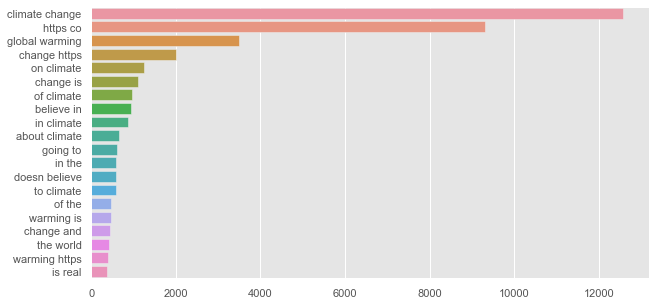

In [ ]:
#Initial minimally cleaned text for top 20 unigram count
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(train_data['message'])[:20]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

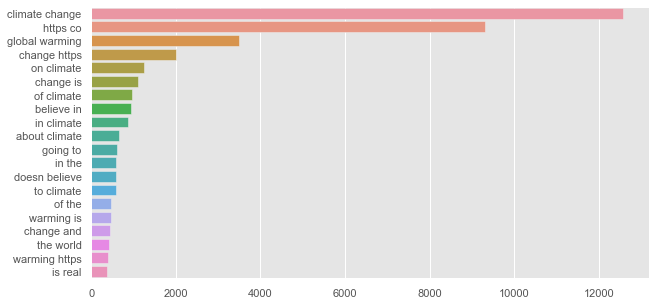

In [ ]:
#Initial minimally cleaned text for top 20 bigram count
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(train_data['message'])[:20]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
#combine so we work smarter, not harder
total = train_data.append(test_data)

#change target to target1 in preparation for the word 'target' to be encoded as its own column
total = total.rename(columns = {'sentiment':'sentiment1'})

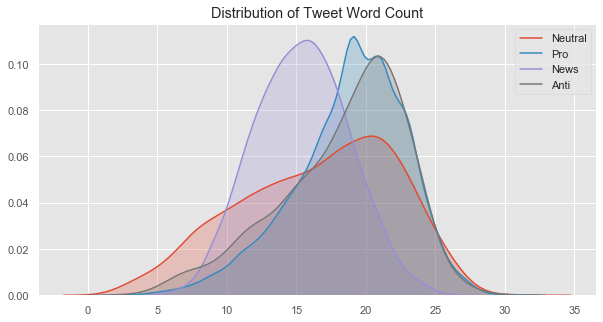

In [ ]:
#create column for the number of words in tweet
total['word_count'] = total['message'].apply(lambda x: len(x.split()))

#split so we can use updated train set with new feature
train_data = total[:len(train_data)]

#define subplot to see graphs side by side
fig, ax = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(train_data['word_count'][train_data['sentiment1'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(train_data['word_count'][train_data['sentiment1'] == 1], shade = True, label = 'Pro')
sns.kdeplot(train_data['word_count'][train_data['sentiment1'] == 2], shade = True, label = 'News')
sns.kdeplot(train_data['word_count'][train_data['sentiment1'] == -1], shade = True, label = 'Anti')

#set title and plot
plt.title('Distribution of Tweet Word Count')
plt.show()

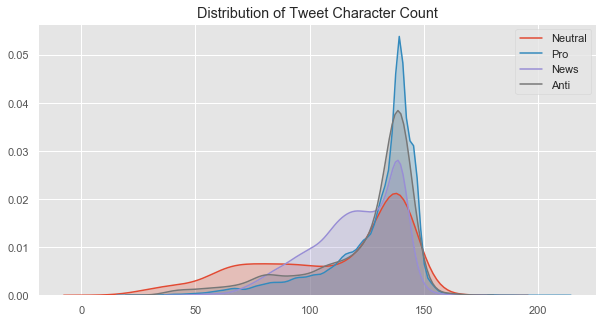

In [ ]:
#create column for the number of characters in a tweet
total['character_count'] = total['message'].apply(lambda x: len(x))

#split so we can use updated train set with new feature
train_data = total[:len(train_data)]

#define subplot to see graphs side by side
fig, ax = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(train_data['character_count'][train_data['sentiment1'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(train_data['character_count'][train_data['sentiment1'] == 1], shade = True, label = 'Pro')
sns.kdeplot(train_data['character_count'][train_data['sentiment1'] == 2], shade = True, label = 'News')
sns.kdeplot(train_data['character_count'][train_data['sentiment1'] == -1], shade = True, label = 'Anti')


#set title and plot
plt.title('Distribution of Tweet Character Count')
plt.show()

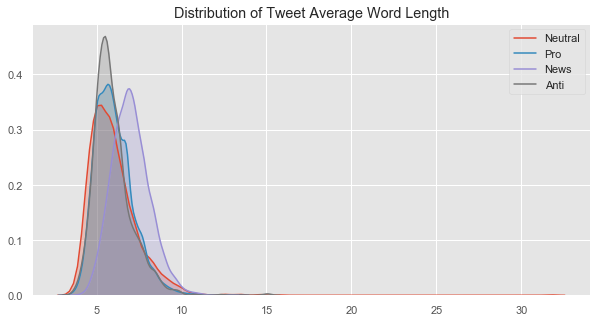

In [ ]:
#define function to find average word length 
def average_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

#broadcast to text column
total['average_word_length'] = total['message'].apply(average_word_length)

#split so we can use updated train set with new feature
train_data = total[:len(train_data)]

#define subplot to see graphs side by side
fig, ax = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(train_data['average_word_length'][train_data['sentiment1'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(train_data['average_word_length'][train_data['sentiment1'] == 1], shade = True, label = 'Pro')
sns.kdeplot(train_data['average_word_length'][train_data['sentiment1'] == 2], shade = True, label = 'News')
sns.kdeplot(train_data['average_word_length'][train_data['sentiment1'] == -1], shade = True, label = 'Anti')

#set title
plt.title('Distribution of Tweet Average Word Length')

#splot graphs
plt.show()

xxxxx

## Insights

##### Analysing the  `label` column in relation to text data
xxxxxx

In [ ]:
# code here

##### Conclude
By now, we should be so much more familiar with the data. GOOD! Let's go a little further with Exploratory Data Analysis (EDA) withing our initial Feature Engineering/Extraction steps that are to follow. Now that we have an idea of what new features to construct and how they might be useful, let's add the rest of them and visualize them.

# Feature Engineering

## Feature generation

###### **task: Generate new features and visualise**

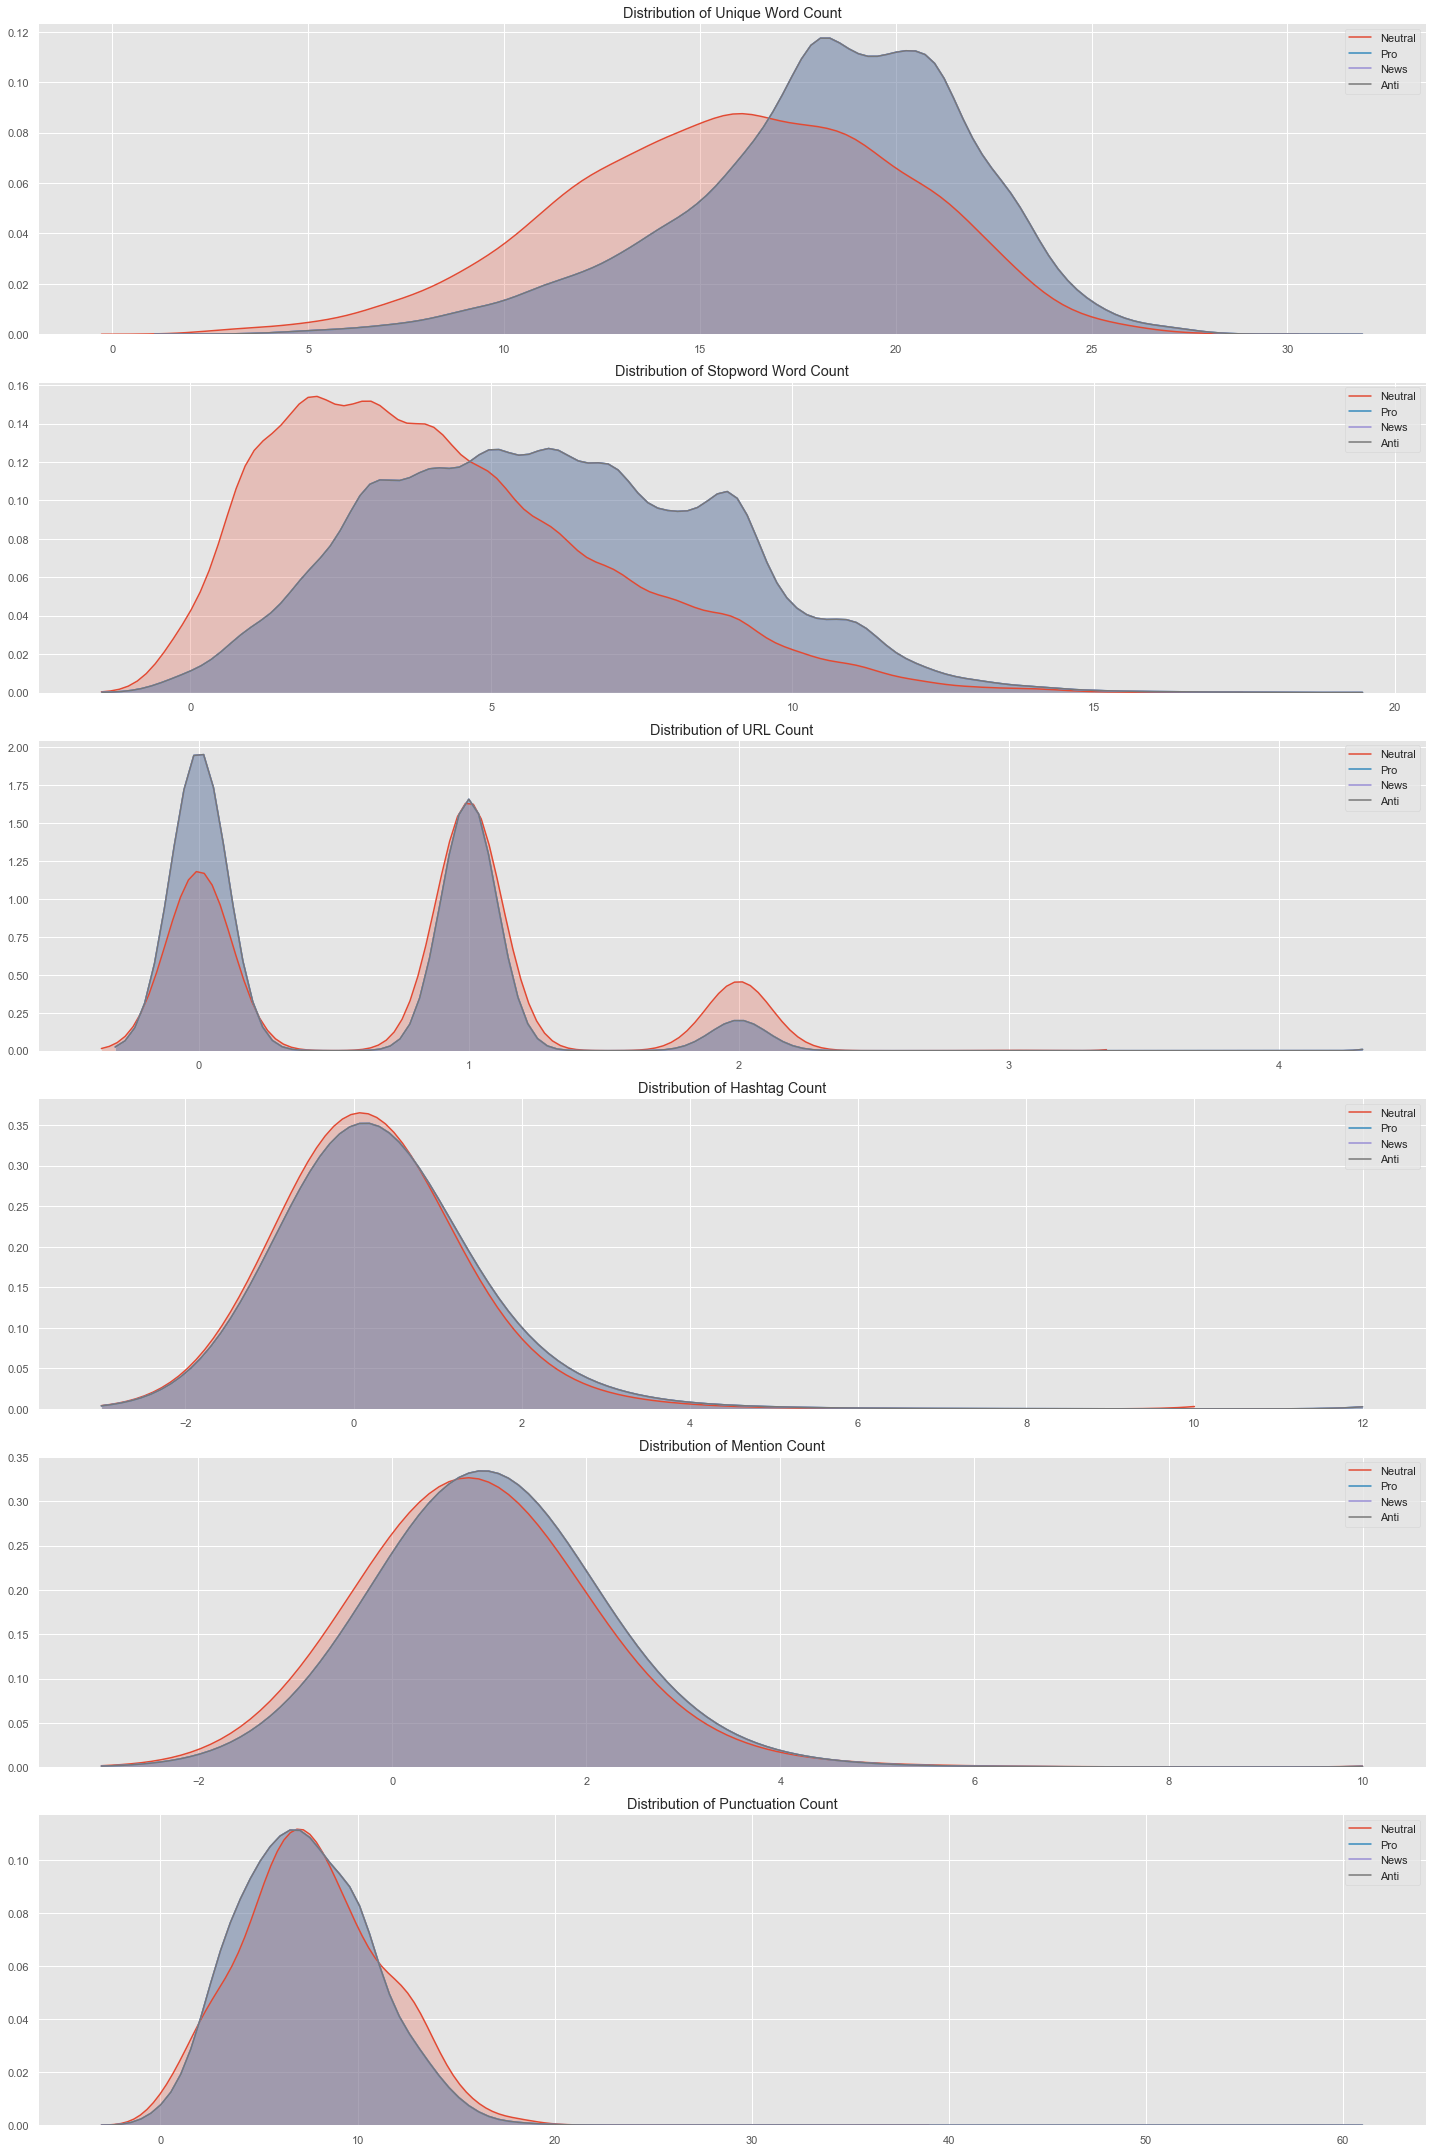

In [ ]:
#add unique word count
total['unique_word_count'] = total['message'].apply(lambda x: len(set(x.split())))

#add stopword count
stopwords = stopwords.words('english')
total['stopword_count'] = total['message'].apply(lambda x: len([i for i in x.lower().split() if i in stopwords]))

#add url count
total['url_count'] = total['message'].apply(lambda x: len([i for i in x.lower().split() if 'http' in i or 'https' in i]))

# add hashtag_count
total['hashtag_count'] = total['message'].apply(lambda x: len([c for c in str(x) if c == '#']))

#add mention count
total['mention_count'] = total['message'].apply(lambda x: len([i for i in str(x) if i == '@']))

#add punctuation count
total['punctuation_count'] = total['message'].apply(lambda x: len([i for i in str(x) if i in string.punctuation]))

#split so we can use updated train set
train_data = total[:len(train_data)]

disaster = train_data['sentiment1'].astype(int) == 1

#produce graphs to visualize newly added features
fig, axes = plt.subplots(6, figsize=(20, 30))

graph1 = sns.kdeplot(train_data.loc[~disaster]['unique_word_count'], shade = True, label = 'Neutral', ax=axes[0])
graph1 = sns.kdeplot(train_data.loc[disaster]['unique_word_count'], shade = True, label = 'Pro', ax=axes[0])
graph1 = sns.kdeplot(train_data.loc[disaster]['unique_word_count'], shade = True, label = 'News', ax=axes[0])
graph1 = sns.kdeplot(train_data.loc[disaster]['unique_word_count'], shade = True, label = 'Anti', ax=axes[0])
graph1.set_title('Distribution of Unique Word Count')

graph2 = sns.kdeplot(train_data.loc[~disaster]['stopword_count'], shade = True, label = 'Neutral', ax=axes[1])
graph2 = sns.kdeplot(train_data.loc[disaster]['stopword_count'], shade = True, label = 'Pro', ax=axes[1])
graph2 = sns.kdeplot(train_data.loc[disaster]['stopword_count'], shade = True, label = 'News', ax=axes[1])
graph2 = sns.kdeplot(train_data.loc[disaster]['stopword_count'], shade = True, label = 'Anti', ax=axes[1])
graph2.set_title('Distribution of Stopword Word Count')

graph3 = sns.kdeplot(train_data.loc[~disaster]['url_count'], shade = True, label = 'Neutral', ax=axes[2])
graph3 = sns.kdeplot(train_data.loc[disaster]['url_count'], shade = True, label = 'Pro', ax=axes[2])
graph3 = sns.kdeplot(train_data.loc[disaster]['url_count'], shade = True, label = 'News', ax=axes[2])
graph3 = sns.kdeplot(train_data.loc[disaster]['url_count'], shade = True, label = 'Anti', ax=axes[2])
graph3.set_title('Distribution of URL Count')

graph4 = sns.kdeplot(train_data.loc[~disaster]['hashtag_count'], shade = True,  label = 'Neutral', ax=axes[3], bw = 1)
graph4 = sns.kdeplot(train_data.loc[disaster]['hashtag_count'], shade = True, label = 'Pro', ax=axes[3], bw =1)
graph4 = sns.kdeplot(train_data.loc[disaster]['hashtag_count'], shade = True, label = 'News', ax=axes[3], bw =1)
graph4 = sns.kdeplot(train_data.loc[disaster]['hashtag_count'], shade = True, label = 'Anti', ax=axes[3], bw =1)
graph4.set_title('Distribution of Hashtag Count')

graph4 = sns.kdeplot(train_data.loc[~disaster]['mention_count'], shade = True,  label = 'Neutral', ax=axes[4], bw = 1)
graph4 = sns.kdeplot(train_data.loc[disaster]['mention_count'], shade = True, label = 'Pro', ax=axes[4], bw =1)
graph4 = sns.kdeplot(train_data.loc[disaster]['mention_count'], shade = True, label = 'News', ax=axes[4], bw =1)
graph4 = sns.kdeplot(train_data.loc[disaster]['mention_count'], shade = True, label = 'Anti', ax=axes[4], bw =1)
graph4.set_title('Distribution of Mention Count')

graph5 = sns.kdeplot(train_data.loc[~disaster]['punctuation_count'], shade = True, label = 'Neutral', ax=axes[5], bw = 1)
graph5 = sns.kdeplot(train_data.loc[disaster]['punctuation_count'], shade = True, label = 'Pro', ax=axes[5], bw = 1)
graph5 = sns.kdeplot(train_data.loc[disaster]['punctuation_count'], shade = True, label = 'News', ax=axes[5], bw = 1)
graph5 = sns.kdeplot(train_data.loc[disaster]['punctuation_count'], shade = True, label = 'Anti', ax=axes[5], bw = 1)
graph5.set_title('Distribution of Punctuation Count')

fig.tight_layout()
plt.show()

In [ ]:
train_data

,sentiment1,message,tweetid,word_count,character_count,average_word_length,unique_word_count,stopword_count,url_count,hashtag_count,mention_count,punctuation_count
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,19,140,6.421053,19,3,1,0,1,12
1,1.0,It's not like we lack evidence of anthropogeni...,126103,10,62,5.300000,10,4,0,0,0,1
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,19,140,6.421053,19,6,2,0,1,12
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,99,5.666667,15,5,1,2,0,8
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,122,5.833333,18,6,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
15814,1.0,RT @ezlusztig: They took down the material on ...,22001,22,140,5.409091,22,7,1,0,1,11
15815,2.0,RT @washingtonpost: How climate change could b...,17856,13,119,8.230769,13,4,1,0,1,10
15816,0.0,notiven: RT: nytimesworld :What does Trump act...,384248,19,133,6.052632,19,4,1,0,0,9
15817,-1.0,RT @sara8smiles: Hey liberals the climate chan...,819732,21,128,5.142857,20,8,0,1,1,4


## Pre-processing
* Data Cleaning
* Using NLP

Now that we have explored our data, we need to prepare it for machine learning. In general, to process text we need to apply the following procedure:

raw text corpus -> processing text -> tokenized text -> corpus vocabulary -> text representation

We can do most of the hard work with Keras's Tokenize object, which automatically converts all words to lowercase and filters out punctuation

This tokenizer has many arguements that allow you to do most of the cleaning with one line of code, so we do not need to much processing ourselves. I have included some examples of how one would manually clean text for reference:

### Create preprocessing functions

In [ ]:
#remove punctuation
def remove_punctuation(message):
    return message.translate(str.maketrans('', '', string.punctuation))

#remove stopwords
StopWords = stopwords
def remove_stopwords(message):
    return ' '.join([i for i in message.split() if i not in StopWords])

#remove words less than 4 
def remove_less_than(message):
    return ' '.join([i for i in message.split() if len(i) > 3])

#remove words with non-alphabet characters
def remove_non_alphabet(message):
    return ' '.join([i for i in message.split() if i.isalpha() == True])

#stem words
stemmer = SnowballStemmer('english')
def stem_words(message):
    return stemmer.stem(message)

#lemmatize words for verb
lemmatizer = WordNetLemmatizer()
def lemmatize_words_verb(message):
    return lemmatizer.lemmatize(message, 'v')

In [ ]:
from keras.preprocessing.text import Tokenizer #in contrast to RegExTokenizer from nltk libarary

contractions = ["can't stop won't stop"]

tokenizer = Tokenizer(filters= "'!#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n")
tokenizer.fit_on_texts(contractions)
tokenizer.word_index

Using TensorFlow backend.


{'t': 1, 'stop': 2, 'can': 3, 'won': 4}

In [ ]:
def correct_contraction(message):
    message = str(message).lower()
    message = re.sub(r"he's", "he is", message)
    message = re.sub(r"there's", "there is", message)
    message = re.sub(r"We're", "We are", message)
    message = re.sub(r"That's", "That is", message)
    message = re.sub(r"won't", "will not", message)
    message = re.sub(r"they're", "they are", message)
    message = re.sub(r"Can't", "Cannot", message)
    message = re.sub(r"wasn't", "was not", message)
    message = re.sub(r"aren't", "are not", message)
    message = re.sub(r"isn't", "is not", message)
    message = re.sub(r"What's", "What is", message)
    message = re.sub(r"i'd", "I would", message)
    message = re.sub(r"should've", "should have", message)
    message = re.sub(r"where's", "where is", message)
    message = re.sub(r"we'd", "we would", message)
    message = re.sub(r"i'll", "I will", message)
    message = re.sub(r"weren't", "were not", message)
    message = re.sub(r"They're", "They are", message)
    message = re.sub(r"let's", "let us", message)
    message = re.sub(r"it's", "it is", message)
    message = re.sub(r"can't", "cannot", message)
    message = re.sub(r"don't", "do not", message)
    message = re.sub(r"you're", "you are", message)
    message = re.sub(r"i've", "I have", message)
    message = re.sub(r"that's", "that is", message)
    message = re.sub(r"i'll", "I will", message)
    message = re.sub(r"doesn't", "does not", message)
    message = re.sub(r"i'd", "I would", message)
    message = re.sub(r"didn't", "did not", message)
    message = re.sub(r"ain't", "am not", message)
    message = re.sub(r"you'll", "you will", message)
    message = re.sub(r"I've", "I have", message)
    message = re.sub(r"Don't", "do not", message)
    message = re.sub(r"I'll", "I will", message)
    message = re.sub(r"I'd", "I would", message)
    message = re.sub(r"Let's", "Let us", message)
    message = re.sub(r"you'd", "You would", message)
    message = re.sub(r"It's", "It is", message)
    message = re.sub(r"Ain't", "am not", message)
    message = re.sub(r"Haven't", "Have not", message)
    message = re.sub(r"Could've", "Could have", message)
    message = re.sub(r"youve", "you have", message)
    message = re.sub(r"haven't", "have not", message)
    message = re.sub(r"hasn't", "has not", message)
    message = re.sub(r"There's", "There is", message)
    message = re.sub(r"He's", "He is", message)
    message = re.sub(r"It's", "It is", message)
    message = re.sub(r"You're", "You are", message)
    message = re.sub(r"I'M", "I am", message)
    message = re.sub(r"shouldn't", "should not", message)
    message = re.sub(r"wouldn't", "would not", message)
    message = re.sub(r"i'm", "I am", message)
    message = re.sub(r"I'm", "I am", message)
    message = re.sub(r"Isn't", "is not", message)
    message = re.sub(r"Here's", "Here is", message)
    message = re.sub(r"you've", "you have", message)
    message = re.sub(r"we're", "we are", message)
    message = re.sub(r"what's", "what is", message)
    message = re.sub(r"couldn't", "could not", message)
    message = re.sub(r"we've", "we have", message)
    message = re.sub(r"who's", "who is", message)
    message = re.sub(r"y'all", "you all", message)
    message = re.sub(r"would've", "would have", message)
    message = re.sub(r"it'll", "it will", message)
    message = re.sub(r"we'll", "we will", message)
    message = re.sub(r"We've", "We have", message)
    message = re.sub(r"he'll", "he will", message)
    message = re.sub(r"Y'all", "You all", message)
    message = re.sub(r"Weren't", "Were not", message)
    message = re.sub(r"Didn't", "Did not", message)
    message = re.sub(r"they'll", "they will", message)
    message = re.sub(r"they'd", "they would", message)
    message = re.sub(r"DON'T", "DO NOT", message)
    message = re.sub(r"they've", "they have", message)
    
    #correct some acronyms while we are at it
    message = re.sub(r"nba", "National Basketball Association", message)
    message = re.sub(r"azwx", "Arizona Weather", message)  
    message = re.sub(r"alwx", "Alabama Weather", message)
    message = re.sub(r"wordpressdotcom", "wordpress", message)      
    message = re.sub(r"gawx", "Georgia Weather", message)  
    message = re.sub(r"scwx", "South Carolina Weather", message)  
    message = re.sub(r"cawx", "California Weather", message)
    message = re.sub(r"usNWSgov", "United States National Weather Service", message) 
    message = re.sub(r"epa", "Environmental Protection Agency", message)
    message = re.sub(r"okwx", "Oklahoma City Weather", message)
    message = re.sub(r"rt", "retweet", message)
    message = re.sub(r"ny", "New York", message)
    message = re.sub(r"arwx", "Arkansas Weather", message)  
  
    
    return message

total['message'] = total['message'].apply(correct_contraction)

In [ ]:
train_data['message']

0        polyscimajor Environmental Protection Agency c...
1        it is not like we lack evidence of anthropogen...
2        retweet @rawstory: researchers say we have thr...
3        #todayinmaker# wired : 2016 was a pivotal year...
4        retweet @soynoviodetodas: it is 2016, and a ra...
                               ...                        
15814    retweet @ezlusztig: they took down the materia...
15815    retweet @washingtonpost: how climate change co...
15816    notiven: retweet: New Yorktimesworld :what doe...
15817    retweet @sara8smiles: hey liberals the climate...
15818    retweet @chet_cannon: .@kuretweeteichenwald's ...
Name: message, Length: 15819, dtype: object

### Remove URL

In [ ]:
example = "My Profile: https://auth.geeksforgeeks.org\
/ user / Chinmoy % 20Lenka / articles in\
the portal of http://www.geeksforgeeks.org/"

In [ ]:
def remove_URL(message):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',message)

remove_URL(example)

'My Profile:  user / Chinmoy % 20Lenka / articles inthe portal of '

In [ ]:
train_data['message']=train_data['message'].apply(lambda x : remove_URL(x))

### Remove line breaks

In [ ]:
example = "Hello \n World"

In [ ]:
print (example)

Hello 
 World


In [ ]:
def line_break(message):
    break_line = message.replace('\n', ' ')
    return break_line

line_break(example)

'Hello   World'

In [ ]:
train_data['message']=train_data['message'].apply(lambda x : remove_URL(x))

### Remove HTML

In [ ]:
example = """<div>
<h1>Reel or Real</h1>
<p>Hindustan </p>
<a href="https://www.hindustan.com/c/nlp-open-the source">get the source</a>
</div>"""

In [ ]:
def remove_html(message):
    html=re.compile(r'<.*?>')
    return html.sub(r'',message)
print(remove_html(example))


Reel or Real
Hindustan 
get the source



In [ ]:
train_data['message']=train_data['message'].apply(lambda x : remove_html(x))

### Remove emojis

In [ ]:
def remove_emoji(message):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', message)

remove_emoji("RT @GlblCtzn: 'I don't wanna live forever – and nothing will because climate change' ����️�� @taylor...")

"RT @GlblCtzn: 'I don't wanna live forever – and nothing will because climate change'  @taylor..."

In [ ]:
train_data['message']=train_data['message'].apply(lambda x: remove_emoji(x))

### Remove PUNCTUATION and CAPITAL letters

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #GREAT Man.,"
print(remove_punct(example))

I am a GREAT Man


In [ ]:
train_data['message']=train_data['message'].apply(lambda x: remove_punct(x).lower())

### Remove numbers

In [ ]:
# remove numbers from text
train_data['message']=train_data['message'].apply(lambda x: re.sub('\w*\d\w*', ' ', x))

### Remove URL extra spaces as a result of cleaning text

In [ ]:
# remove extra spaces
train_data['message']=train_data['message'].apply(lambda x: re.sub(' +',' ',x))

### Check the spelling

In [ ]:
#!pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "corect me plese"
correct_spellings(text)

'correct me please'

In [ ]:
#train_data['message']=train_data['message'].apply(lambda x: correct_spellings(x))

In [ ]:
train_data.head(5).T

,0,1,2,3,4
sentiment1,1,1,2,1,1
message,polyscimajor environmental protection agency c...,it is not like we lack evidence of anthropogen...,retweet rawstory researchers say we have three...,todayinmaker wired was a pivotal year in the w...,retweet soynoviodetodas it is and a racist sex...
tweetid,625221,126103,698562,573736,466954
word_count,19,10,19,15,18
character_count,140,62,140,99,122
average_word_length,6.42105,5.3,6.42105,5.66667,5.83333
unique_word_count,19,10,19,15,18
stopword_count,3,4,6,5,6
url_count,1,0,2,1,0
hashtag_count,0,0,0,2,1


###### task: check whether processed data has any missing values before selecting features 

In [ ]:
#X = np.array(train_data['message'])  # this time we want to look at the text
#y = np.array(train_data['sentiment'])
#X_test = np.array(test_data['message'])

In [ ]:
train_data.isnull().sum()

sentiment1             0
message                0
tweetid                0
word_count             0
character_count        0
average_word_length    0
unique_word_count      0
stopword_count         0
url_count              0
hashtag_count          0
mention_count          0
punctuation_count      0
dtype: int64

In [ ]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

sentiment1             0
message                0
tweetid                0
word_count             0
character_count        0
average_word_length    0
unique_word_count      0
stopword_count         0
url_count              0
hashtag_count          0
mention_count          0
punctuation_count      0
dtype: int64

In [ ]:
train_data.T

,0,1,2,3,4,5,6,7,8,9,...,15809,15810,15811,15812,15813,15814,15815,15816,15817,15818
sentiment1,1,1,2,1,1,1,1,1,1,1,...,2,0,1,1,1,1,2,0,-1,0
message,polyscimajor environmental protection agency c...,it is not like we lack evidence of anthropogen...,retweet rawstory researchers say we have three...,todayinmaker wired was a pivotal year in the w...,retweet soynoviodetodas it is and a racist sex...,woretweeth a read whether you do or do not bel...,retweet thenation mike pence doesn’t believe i...,retweet makeandmendlife six big things we can ...,aceofspadeshq my nephew is inconsolable he wan...,retweet paigetweedy no offense… but like… how ...,...,the quest to capture and store carbon — and sl...,this global warming so late in the season is p...,retweet stephenschlegel she is thinking about ...,retweet sierraclub hottest year in history als...,retweet thinkprogress environmental protection...,retweet ezlusztig they took down the material ...,retweet washingtonpost how climate change coul...,notiven retweet new yorktimesworld what does t...,retweet hey liberals the climate change crap i...,retweet chetcannon kuretweeteichenwalds climat...
tweetid,625221,126103,698562,573736,466954,425577,294933,992717,664510,260471,...,705048,572819,426353,989478,442853,22001,17856,384248,819732,806319
word_count,19,10,19,15,18,14,16,23,25,15,...,19,12,19,20,16,22,13,19,21,10
character_count,140,62,140,99,122,110,119,152,139,88,...,119,63,146,140,140,140,119,133,128,102
average_word_length,6.42105,5.3,6.42105,5.66667,5.83333,6.92857,6.5,5.65217,4.6,4.93333,...,5.31579,4.33333,6.73684,6.05,7.8125,5.40909,8.23077,6.05263,5.14286,9.3
unique_word_count,19,10,19,15,18,14,16,21,24,15,...,17,12,18,18,16,22,13,19,20,10
stopword_count,3,4,6,5,6,6,3,10,10,8,...,6,5,9,4,2,7,4,4,8,1
url_count,1,0,2,1,0,2,1,1,0,0,...,1,0,1,1,2,1,1,1,0,1
hashtag_count,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
def get_top_tweet_unigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(6, 6)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

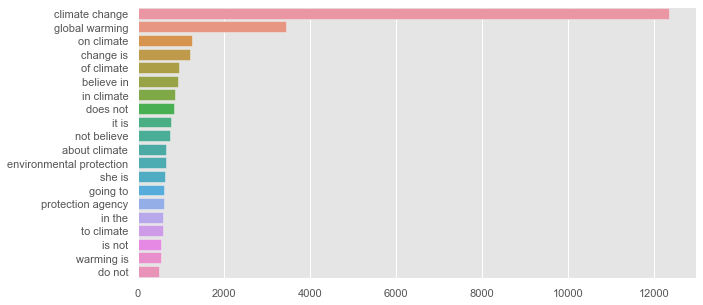

In [ ]:
#check cleaned text for top 20 bigram count
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(train_data['message'])[:20]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
# Check for whitespace strings (it's OK if there aren't any!):
#blanks = []  # start with an empty list

#for i,lb,msg, x, tid in train_data.itertuples():  # iterate over the DataFrame
   # if type(msg)==str:            # avoid NaN values
        #if msg.isspace():         # test 'review' for whitespace
           #blanks.append(i)     # add matching index numbers to the list
        
#print(len(blanks), 'blanks: ', blanks)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_transformed = cv.fit_transform((train_data['lemmatized'])
#X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.33, random_state=42)
#X_raw.shape

In [ ]:
#Option 1: Count vectorization
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(text_counts, train_data['sentiment'], stratify=train_data['sentiment'], test_size=0.67, random_state=50)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer()

#X_train_tfidf = vectorizer.fit_transform(X_train) 
#X_test_tfidf = vectorizer.transform(X_test)

#X_raw = train_data.drop('sentiment', axis=1)
#y_raw = train_data['sentiment']

#X_train_tfidf.shape

###### task: split the data into train & test sets

In [ ]:
#Option 2: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf = tf.fit_transform(train_data['message'])

In [ ]:
#Option 2: TFIDF
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, train_data['sentiment1'], test_size=0.67, random_state=42)
X_train.shape

(5220, 23201)

In [ ]:
#Option 3: TFIDF
from sklearn.model_selection import train_test_split

X = train_data['message']  # this time we want to look at the text
y = train_data['sentiment1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Option 3: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train.shape

(5220, 11776)

#Summarise findings

##### Base Model

<img aria-hidden="true" jsname="VAJbob" class="U48l9e" src="https://lh3.googleusercontent.com/rTpeDFt5PuVxf_5ojPoB6NGhIbDRkZTv3c7cWog3iK6q_CaDNygyWh9yIESTqZWYpKbHx46o-wWtQ5dIMUBUiWFsZrgCtXq059-fWqG_exoB7z1m7Tly7NKYQakBYenkn13yxaP8bm6hIuFPmgxzAoAoSUxsR71FpTk9Lzc-F0pprCPcUcJAXm7fAGZSsjR7MjnU7PrMDMd_m6yT63b-jZwAzcu0SQV7jBOaGMWLX_CePhBoN4x7TNXR3PiYU7USujyVnKV9krzqIIgeWrh7Hs_AvEcRSumKlj2g4Aa1XxXUsgWoS-7iFJ2KLHQyXvbqg01VM5FFZsDg71c3phrNM5zSeW7IQKB5_DMAVqB_7qr2jiGU0hQj1871D2UlozkdEPeaVKBBJDMzbYkdN6eUSYceq3frzlDX6mubIHLCdFALlt2VmnvqwWLMC-YsrMdPffSRUInH89L7YHCdmnvjZ2cjAtvY5Uga2wxCEvAl8KEf3tS37O0jH2QkRqCUJyVRKtXyVfORIiUyn-swMK59JPfMWgfD5t-BxPxeMAzR0gQONmuzsjrnY112Qh_ks1KxELTVTKtKdvT09NsnG63cmN6x55Vcxt2kASBGOxrDD7NcHh7XgjfBuhIJYO6aR-aKc3Lybarcc5F6K21D3InSbTcYVKxVEI4dXF1aQO-rbNMCn9czkZF3fsNymNcuMA=w1481-h613-no?authuser=0" data-iml="1923250.1149999988">

###### **task: minimal data preprocessing**

In [ ]:
# code here

###### **task: train a Logistic Regression classifier**


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=1.0, solver='lbfgs', class_weight=None, multi_class='auto')

lr_model.fit(X_train, y_train)

pred_lr = lr_model.predict(X_test)


###### **task: train a Naive Bayes Regression classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
pred_nb = clf.predict(X_test)

###### **task: train a Support Vector Machine (SVM) classifier**

In [ ]:
# Form a prediction set
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
pred_lsvc = clf.predict(X_test)

In [ ]:
# Form a prediction set
#from sklearn.svm import LinearSVC
#clf = LinearSVC()
#clf.fit(X_train_tfidf, y_train)
#pred_lsvc = clf.predict(X_test)

In [ ]:
#from sklearn.svm import LinearSVC

#lsvc_model = LinearSVC()

#lsvc_model.fit(X_train, y_train)

## Initial model evaluation

###### **task: test the Accuracy of the model**


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("SVC Accuracy:",metrics.accuracy_score(y_test, pred_lsvc))

SVC Accuracy: 0.7113878667798849


In [ ]:
print(metrics.confusion_matrix(y_test,pred_lsvc))

[[ 185   56  167   20]
 [  24  312  325   76]
 [  33  150 2462  216]
 [   6   29  266  894]]


In [ ]:
print(metrics.classification_report(y_test,pred_lsvc))

              precision    recall  f1-score   support

        -1.0       0.73      0.33      0.45       865
         0.0       0.57      0.37      0.45      1555
         1.0       0.73      0.87      0.79      5750
         2.0       0.72      0.70      0.71      2429

    accuracy                           0.71     10599
   macro avg       0.69      0.57      0.60     10599
weighted avg       0.70      0.71      0.69     10599



In [ ]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, pred_nb))

MultinomialNB Accuracy: 0.5846777997924333


In [ ]:
print(metrics.confusion_matrix(y_test,pred_nb))

[[   1    0  418    9]
 [   0   45  677   15]
 [   0    0 2832   29]
 [   0    0  782  413]]


In [ ]:
print(metrics.classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       865
         0.0       1.00      0.01      0.02      1555
         1.0       0.57      1.00      0.72      5750
         2.0       0.94      0.19      0.31      2429

    accuracy                           0.58     10599
   macro avg       0.63      0.30      0.26     10599
weighted avg       0.67      0.58      0.47     10599



In [ ]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, pred_lr))

Logistic Regression Accuracy: 0.6951599207472403


In [ ]:
print(metrics.confusion_matrix(y_test,pred_lr))

[[ 116   84  613   52]
 [   8  376 1061  110]
 [   6  115 5302  327]
 [   2   17  836 1574]]


In [ ]:
labels = ['0: Neutral', '1: Pro', '2:News', '-1:Anti']

pd.DataFrame(data=confusion_matrix(y_test, pred_lr), index=labels, columns=labels)

,0: Neutral,1: Pro,2:News,-1:Anti
0: Neutral,116,84,613,52
1: Pro,8,376,1061,110
2:News,6,115,5302,327
-1:Anti,2,17,836,1574


In [ ]:
# Saving each metric to add to a dictionary for logging to comet
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

precision = precision_score(y_test, pred_lr, labels=None, average='macro')
recall = recall_score(y_test, pred_lr, labels=None, average='macro')
f1 = f1_score(y_test, pred_lr, labels=None, average='macro')


In [ ]:
# Create dictionaries for the comet data we want to log

#params = {"random_state": 7,
          #"model_type": "logreg",
          #"scaler": "standard scaler",
          #"param_grid": str(param_grid),
          #"stratify": True
          #}

metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

In [ ]:
# Log our comet parameters and results
#experiment.log_parameters(params)
#experiment.log_metric("accuracy", f1)
print("Logistic regression f1 macro score metrics: ", metrics)

Logistic regression f1 macro score metrics:  {'f1': 0.516411566762761, 'recall': 0.4864987348469413, 'precision': 0.7388972510624349}


In [ ]:
print(metrics.classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

        -1.0       0.88      0.13      0.23       865
         0.0       0.64      0.24      0.35      1555
         1.0       0.68      0.92      0.78      5750
         2.0       0.76      0.65      0.70      2429

    accuracy                           0.70     10599
   macro avg       0.74      0.49      0.52     10599
weighted avg       0.71      0.70      0.66     10599



In [ ]:
experiment.end()

###### **task: display experiment on comet**

In [ ]:
experiment.display()

###### **task: save output of highest performing model results**

In [ ]:
sample_data

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1
...,...,...
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,1


In [ ]:
clf.predict(X_test)

array([1., 2., 1., ..., 2., 2., 1.])

In [ ]:
lr_model.predict(X_test)

array([1., 2., 1., ..., 2., 2., 1.])

In [ ]:
y_pred= pd.DataFrame(pred_lsvc).astype(int)
base_df = pd.DataFrame()
base_df['tweetid'] = test_data['tweetid']
base_df['sentiment'] = y_pred
sample_data['sentiment'].value_counts()

1    10546
Name: sentiment, dtype: int64

In [ ]:
#base_df.to_csv('/kaggle/working/submissionv4.csv', index=False)

In [ ]:
base_df

,tweetid,sentiment
0,169760,1
1,35326,2
2,224985,1
3,476263,-1
4,872928,0
...,...,...
10541,895714,2
10542,875167,1
10543,78329,2
10544,867455,-1


#Summary of findings

##### Conclude
xxxxx

## Further Feature Extraction

###### **task: get table of summary statistics of data**
xxxxx

In [ ]:
# summary statistics


#Summarise findings

###### **task: generate distribution plots**

In [ ]:
# code here

#Summarise findings

###### **task: investigate features further**
xxxxx

In [ ]:
# code here

#Summarise findings

###### task: create additional features using NLP techniques
xxx

In [ ]:
# code here

#Summarise reasoning

###### task: additional visualisations


In [ ]:
# code here

#Summarise findings

###### **task: get additional summary statistics of data**
xxxxx

#Summarise findings

# Predictive Modelling
xxxxxx


## An Overview of learners
The list of models we will train is as follows:
xxxxxx

### Logistic Regression

Logistic regression is xxxxxx.

### K-Nearest Neighbours

K-Nearest Neighbours is xxxxxx.

### Support Vector Machines 

Support Vector Machines is xxxxxx.

### Naïve Bayes

Naïve Bayes is xxxxxx.

### Decision Tree

The Decision tree model uses a non parameterised approach to making predictions. Its basically a series of questions that the algorithm asks about a particular sample. For example, if the value is this then the target is that. The algorithm starts off by selecting a variable that produces the best split of the data. Every predictor is assigned an impurity scores based on how accurate its predictions are (measured by rmse). The feature with the lowest impurity score is used for the initial split at the top of the tree, know as the root node. The other variables are used for splits down the tree all the way to the final predictions at the leaf nodes. Trees can easily overfit the training data because of their slightly more complex nature compared with linear models. Therefore it is common to build a tree to maximum depth and then prune it by getting rid of branches that do not necessarily result in significantly lower rmse in the next node. Finally, tree can easily decipher non linear patterns in dataset and thusare often useful for non linearly distributed datasets. 

### Random Forest

Random Forest is an extension of decision trees. Single decision tree often have high variance. Their predictions depend a lot on the data they were trained on. A slight change to the training set, their predictions change significantly. Because of this a popular technique is on of building multiple trees and averaging their predictions. This is known as bootstrap aggregation, meaning multiple models are trained on different subsets of the training data. The subsets are obtained through a bootstrap sampling approach where samples can be randomly selected more than once until the length of the bootstrap is equal to the length of the original training set. Note that some of the samples are left out (refered to as out of bag samples). The model is then trained on the bootstrap sample. Random forest takes sampling to yet another level by also using a subset of the predictors to build each tree. This results in not so highly correlated tree in the forest that if averaged can produce stable predictions with little variance. The user has the option to choose the number of tree of treat it as a hyper-paramer to be determined by the data.

## An Overview of the features
xxxxx

In [ ]:
# code here

## An explanation of Pipelines

xxxxxx

## Build a pipeline to vectorize the data, then train and fit a model
xxxx

In [ ]:
#code here
#from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.svm import LinearSVC

#text_clf = Pipeline([('tfidf', TfidfVectorizer()),
#                     ('clf', LinearSVC()),
#])

# Feed the training data through the pipeline
#text_clf.fit(X_train, y_train)  

#Short explanation of code

## Run predictions and analyze the results

In [ ]:
#code here

# Feature Selection and Model Selection

xxxxx

The code cell below applies the function over multiple Variance Thresholds. We chose value between 0 and 50, increasing exponentially. See the cell.

###### **task: perform vector arithmetic between features**
xxxxx  

#Summarise findings

##### **Reguarisation - Improving model perfomance**
xxxx

In [ ]:
`

###### **task: implement L1 & L2 Regularisation for Logistic Regression**
xxxxxx

In [ ]:
# code here

###### task: select the best variables

In [ ]:
# code here

## Hyperparameter tuning

###### task: adjust hyperparameter/s of chosen model


xxxxx

In [ ]:
# code here

## Model Evaluation

###### task: select the best model


xxxxxx

In [ ]:
# code here

# Summary of Conclusions



## Data Exploration
xxxxx
## Exploratory data analysis

xxxxxx

## Predictive modelling

xxxxxx


## Feature selection

xxxxxx



## Recommendations

xxxxxx


## Key takeaways
xxxxxx
